In [4]:
import sys

!pip3 install transformers==4.15.0 timm==0.4.12 fairscale==0.4.4
# !git clone https://github.com/salesforce/BLIP
%cd BLIP


Defaulting to user installation because normal site-packages is not writeable
/Users/phamgi/Library/CloudStorage/GoogleDrive-trungdunght2003@gmail.com/My Drive/NCS/Colab Notebooks/BLIP


In [21]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

def load_demo_image(image_size, device):
    img_url = 'https://linkhay.mediacdn.vn/upload/media/92215.3RCF1640c7a5c15d87.resized.jpeg' 
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')   

    w,h = raw_image.size
    display(raw_image.resize((w//2,h//2)))
    
    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ]) 
    image = transform(raw_image).unsqueeze(0).to(device)   
    return image

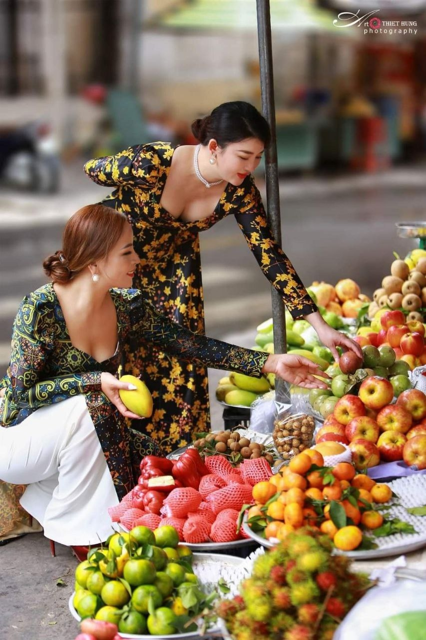

reshape position embedding from 196 to 576
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth
caption: person and person buying fresh fruits at the fruit stand in front of person and person


In [34]:
from models.blip import blip_decoder

image_size = 384
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
image = load_demo_image(image_size = image_size, device = device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth'
    
model = blip_decoder(pretrained = model_url, image_size = image_size, vit = 'base')
model.eval()
model = model.to(device)
question = 'how many wonem?'

with torch.no_grad():
    # beam search
    # caption = model.generate(image, sample = False, num_beams = 3, max_length = 20, min_length = 5) 
    # nucleus sampling
    caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5) 
    print('caption: '+caption[0])

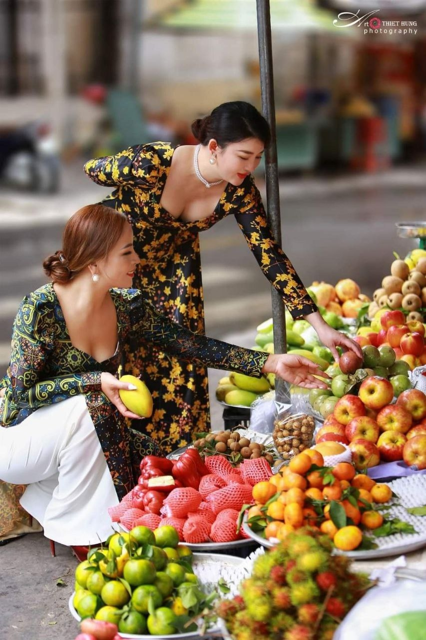

  0%|          | 0.00/1.35G [00:00<?, ?B/s]

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth
answer: on ground


In [33]:
from models.blip_vqa import blip_vqa

image_size = 480
image = load_demo_image(image_size=image_size, device=device)     

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth'
    
model = blip_vqa(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

question = 'where is the woman sitting?'

with torch.no_grad():
    answer = model(image, question, train=False, inference='generate') 
    print('answer: '+answer[0])